In [19]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [4]:
from tensorflow.examples.tutorials.mnist import input_data

In [6]:
mnist = input_data.read_data_sets("MNIst_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIst_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIst_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIst_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIst_data/t10k-labels-idx1-ubyte.gz


In [7]:
nb_classes = 10

In [8]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])
W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

In [10]:
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [12]:
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [13]:
training_epochs = 15
batch_size = 100

Epoch: 0001 cost= 8.084128873
Epoch: 0002 cost= 4.399368909
Epoch: 0003 cost= 3.110179181
Epoch: 0004 cost= 2.477934049
Epoch: 0005 cost= 2.104472564
Epoch: 0006 cost= 1.859678298
Epoch: 0007 cost= 1.687399575
Epoch: 0008 cost= 1.559768250
Epoch: 0009 cost= 1.460291305
Epoch: 0010 cost= 1.380060787
Epoch: 0011 cost= 1.313376734
Epoch: 0012 cost= 1.257098432
Epoch: 0013 cost= 1.208645852
Epoch: 0014 cost= 1.166039538
Epoch: 0015 cost= 1.128718676
Accuracy:  0.7858
label: [9]
Prediction: [9]


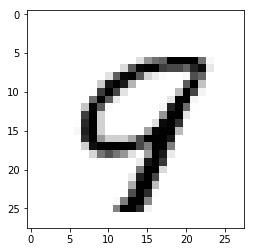

In [23]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
        print('Epoch:', '%04d' %(epoch+1), 'cost=', '{:.9f}'.format(avg_cost))
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
    r = random.randint(0, mnist.test.num_examples -1)
    print("label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction:", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r+1]}))
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.show()